In [3]:
import pandas as pd
import matplotlib.pyplot as plt

- ### *Carregamento de dados*

In [9]:
temp_df = pd.read_csv('data/temperatura-RJ.csv', skiprows=3, index_col="time", parse_dates=True)
temp_df

,temperature_2m_mean (°C)
time,
1979-01-01,26.9
1979-01-02,26.0
1979-01-03,26.4
1979-01-04,24.2
1979-01-05,23.2
...,...
2025-06-26,20.6
2025-06-27,22.1
2025-06-28,22.7


In [10]:
# Verificar dados nulos
# Dica de vídeo: Python para Energia Eólica
print("Dados nulos em temperatura:")
temp_df.isna().sum()

Dados nulos em temperatura:


temperature_2m_mean (°C)    0
dtype: int64

In [11]:
# Estatísticas básicas dos dados (contagem de valores, média, desvio padrão, valores mínimo e máximo, etc.)
print("Estatísticas básicas dos dados de temperatura:")
temp_df.describe()

Estatísticas básicas dos dados de temperatura:


,temperature_2m_mean (°C)
count,16983.000000
mean,23.799335
std,2.710368
min,15.300000
25%,21.800000
50%,23.800000
75%,25.900000
max,31.300000


<Axes: >

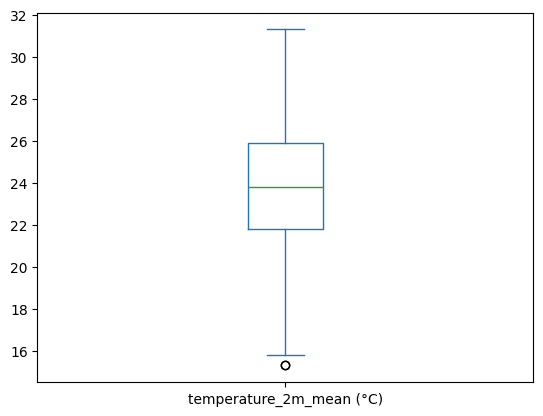

In [12]:
# Verificação de outliers
temp_df.plot(kind='box')

- ###  *Análise Exploratória dos dados*

In [13]:
# Buscando os valores máximos e mínimos da série temporal
print("Dia mais frio da história:")
dia_mais_frio = temp_df.idxmin()
print(dia_mais_frio)

Dia mais frio da história:
temperature_2m_mean (°C)   1988-07-13
dtype: datetime64[ns]


In [14]:
# Buscando os valores máximos e mínimos da série temporal
print("Dia mais quente da história:")
dia_mais_quente = temp_df.idxmax()
print(dia_mais_quente)

Dia mais quente da história:
temperature_2m_mean (°C)   2023-11-18
dtype: datetime64[ns]


<Axes: xlabel='time'>

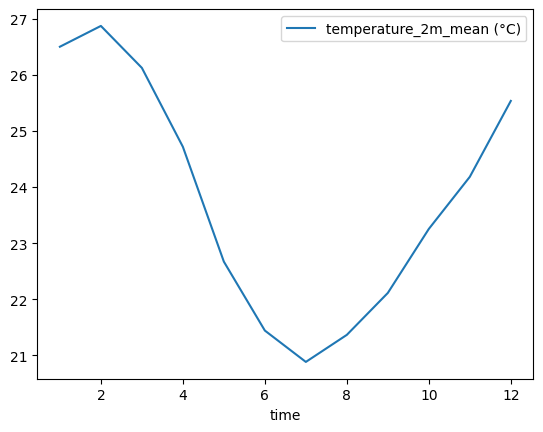

In [17]:
# Médias históricas mensais
medias_mensais = temp_df.groupby(temp_df.index.month).mean()
medias_mensais.plot()

<Axes: xlabel='time'>

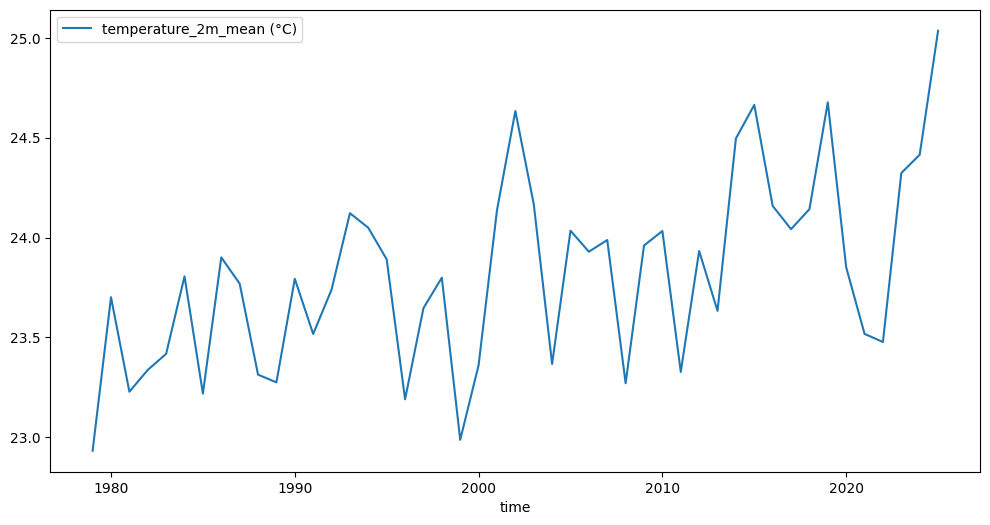

In [19]:
# Médias históricas anuais
medias_anuais = temp_df.groupby(temp_df.index.year).mean()
medias_anuais.plot(figsize=(12, 6))

In [23]:
# Ano mais quente da história
medias_anuais.drop(2025).idxmax()

temperature_2m_mean (°C)    2019
dtype: int32

- ### *Visualização de Dados*

In [24]:
dados_anuais = medias_anuais.drop(2025)

In [27]:
plt.style.use('dark_background')

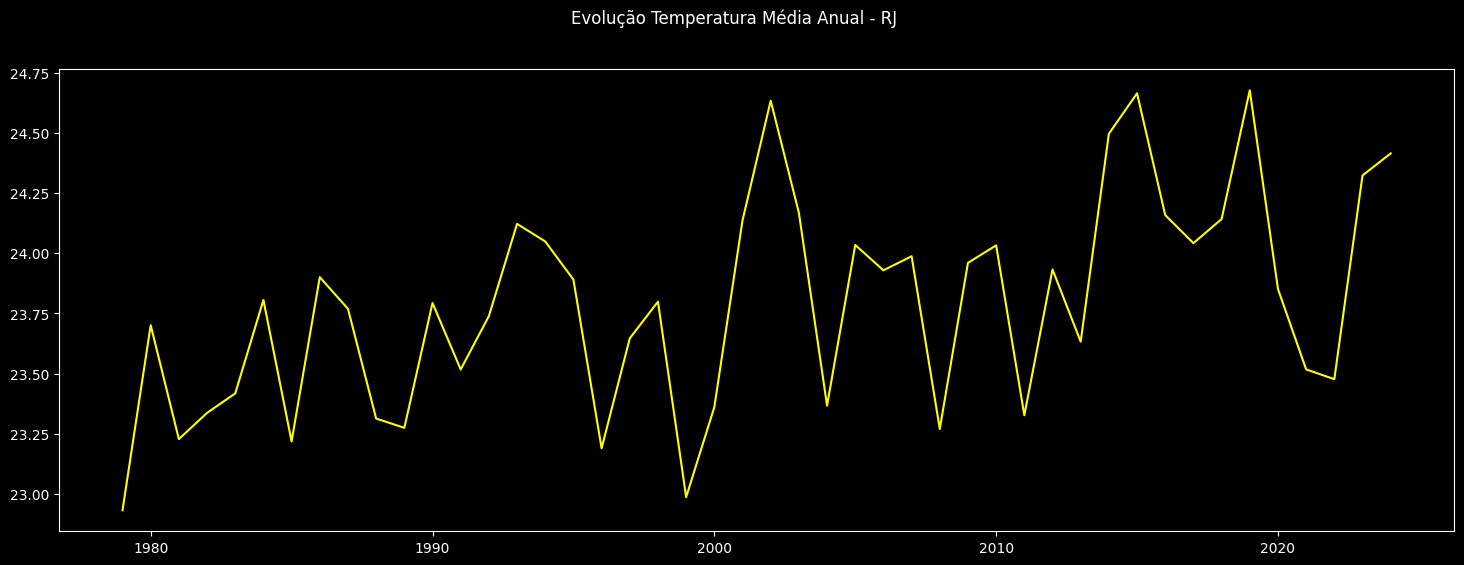

In [ ]:
# Cria figura e área de plotagem
fig, ax = plt.subplots(figsize=(18, 6))

# Adiciona título para a figura
fig.suptitle("Evolução Temperatura Média Anual - RJ")

# Plota gráfico de linha
ax.plot(dados_anuais, color="yellow")

# Remove grade


- ### *Exportação de dados*

In [31]:
#Exporta dados anuais para Excel
dados_anuais.to_excel("data/temperatura_anual_rj_dados.xlsx")